### Description of the electrical consumption datasets

The EDF R&D Pole Database is provided by the EDF R&D pole and contains the electrical consumption data from seals between December 16, 2006 and November 26, 2010, to the minute, for a total of 2,049,280Observations.

### Variables

The gross database is made up of 9 variables:
- `` date: date (in DD/mm/yyyy format)
- `Time`: the time (in HH format: mm: SS)
- `global_active_power`: the average active power per minute in the entire household (in kilowatts)
- `global_reactive_power`: the average reactive power per minute in the entire household (in kilowatts)
- `Voltage`: average voltage per minute (in volts)
- `Global_intensity`: the intensity of average current per minute in the entire household (in amps)
-`SUB_METERING_1 ': the energy sub which energy n ° 1 (in active energy watt-hour).It corresponds to the kitchen, mainly containing a dishwasher, an oven and a microwave (the cooking plates are not electric but supplied with gas).
-`SUB_METERING_2`: the energy sub which energy n ° 2 (in active energy watt-hour).It corresponds to the laundry room, containing a washing machine, a dryer, a refrigerator and lighting.
-`SUB_METERING_3`: the energy sub which energy n ° 



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load the dataset
file_path = 'household_power_consumption.csv'  # Replace with your local file path
data = pd.read_csv(file_path)

# Convert Date
# and Time into a single datetime column
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')
data = data.drop(columns=['Date', 'Time'])

# Ensure numeric columns are in the correct data type
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')


C:\Users\91951\AppData\Local\Temp\ipykernel_30136\3644438572.py:7: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [2]:
df = data

In [3]:
# Sample 10% of the dataset
sampled_df = df.sample(frac=0.1, random_state=42)

In [ ]:
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

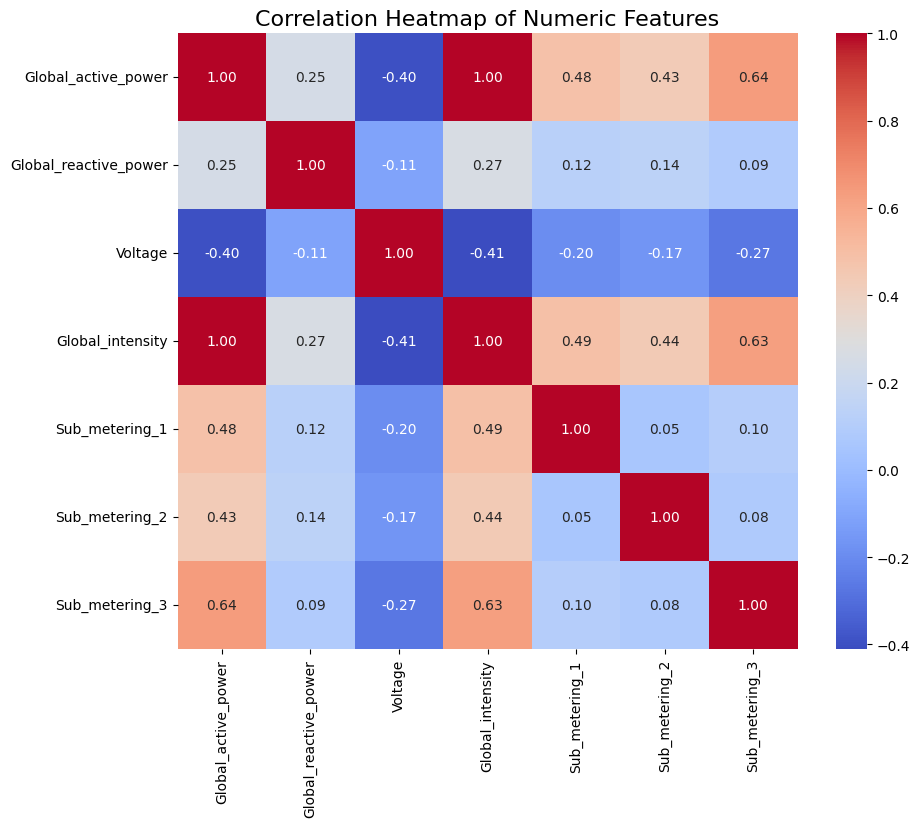

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = data[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.show()


C:\Users\91951\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


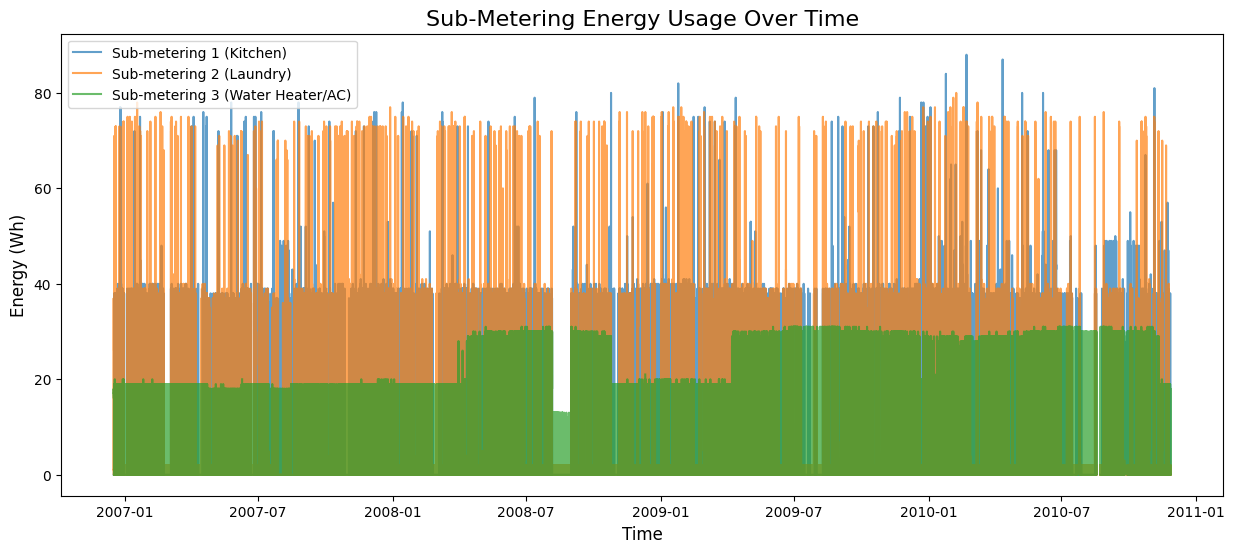

In [ ]:
# Sub-metering energy usage
plt.figure(figsize=(15, 6))
plt.plot(data['Datetime'], data['Sub_metering_1'], label='Sub-metering 1 (Kitchen)', alpha=0.7)
plt.plot(data['Datetime'], data['Sub_metering_2'], label='Sub-metering 2 (Laundry)', alpha=0.7)
plt.plot(data['Datetime'], data['Sub_metering_3'], label='Sub-metering 3 (Water Heater/AC)', alpha=0.7)
plt.title('Sub-Metering Energy Usage Over Time', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Energy (Wh)', fontsize=12)
plt.legend()
plt.show()


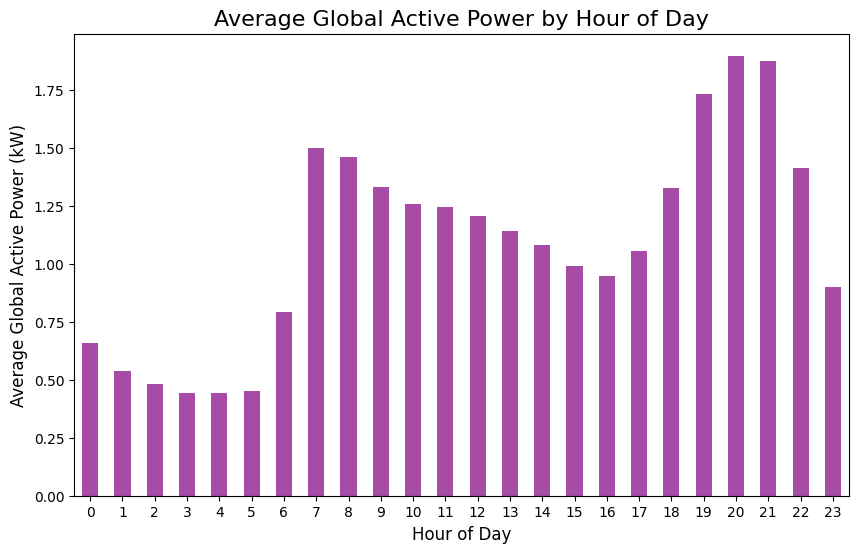

In [ ]:
# Extract hour from datetime
data['Hour'] = data['Datetime'].dt.hour

# Group by hour and calculate mean global active power
hourly_usage = data.groupby('Hour')['Global_active_power'].mean()

# Plot hourly trends
plt.figure(figsize=(10, 6))
hourly_usage.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Average Global Active Power by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Global Active Power (kW)', fontsize=12)
plt.xticks(rotation=0)
plt.show()


In [215]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
import numpy as np

In [216]:
# Load the uploaded dataset
file_path = 'household_power_consumption.csv'
data = pd.read_csv(file_path)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9232\4042141851.py:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [217]:
# Display the first few rows of the dataset and summary information
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


(         Date      Time Global_active_power Global_reactive_power  Voltage  \
 0  16/12/2006  17:24:00               4.216                 0.418  234.840   
 1  16/12/2006  17:25:00               5.360                 0.436  233.630   
 2  16/12/2006  17:26:00               5.374                 0.498  233.290   
 3  16/12/2006  17:27:00               5.388                 0.502  233.740   
 4  16/12/2006  17:28:00               3.666                 0.528  235.680   
 
   Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
 0           18.400          0.000          1.000            17.0  
 1           23.000          0.000          1.000            16.0  
 2           23.000          0.000          2.000            17.0  
 3           23.000          0.000          1.000            17.0  
 4           15.800          0.000          1.000            17.0  ,
 None)

In [218]:
# Specific column to check
column_name = 'Global_active_power'

# Count rows with '?' in the specified column
count_question_rows = data[data[column_name] == '?'].shape[0]
print(f"Number of rows with '?' in '{column_name}':", count_question_rows)

Number of rows with '?' in 'Global_active_power': 25979


In [219]:
# Percentage of the missing data
count_question_rows/len(data) * 100

1.2518437457686005

In [220]:
# Specific column to check
column_name = 'Sub_metering_1'

# Remove rows with '?' in the specified column
df_cleaned = data[data[column_name] != '?']
# df_cleaned = df_cleaned.head(2000000)
df_cleaned = df_cleaned.sample(frac=0.1, random_state=42)
display(df_cleaned)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1030580,1/12/2008,09:44:00,1.502,0.074,240.170,6.400,0.000,0.000,18.0
1815,17/12/2006,23:39:00,0.374,0.264,245.500,1.800,0.000,2.000,0.0
1295977,3/6/2009,17:01:00,0.620,0.300,239.850,3.000,0.000,1.000,1.0
206669,9/5/2007,05:53:00,0.280,0.200,235.720,1.400,0.000,0.000,0.0
1048893,14/12/2008,02:57:00,1.372,0.054,243.950,5.600,0.000,0.000,18.0
...,...,...,...,...,...,...,...,...,...
741481,14/5/2008,15:25:00,3.414,0.080,238.250,14.400,37.000,0.000,16.0
768323,2/6/2008,06:47:00,3.440,0.000,239.710,14.800,0.000,0.000,16.0
910134,8/9/2008,18:18:00,0.224,0.084,241.860,1.000,0.000,0.000,1.0
462125,2/11/2007,15:29:00,1.362,0.094,239.920,5.600,0.000,0.000,18.0


In [221]:
# Display the first few rows of the dataset and summary information
df_cleaned.head(), df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204928 entries, 1030580 to 1388853
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   204928 non-null  object 
 1   Time                   204928 non-null  object 
 2   Global_active_power    204928 non-null  object 
 3   Global_reactive_power  204928 non-null  object 
 4   Voltage                204928 non-null  object 
 5   Global_intensity       204928 non-null  object 
 6   Sub_metering_1         204928 non-null  object 
 7   Sub_metering_2         204928 non-null  object 
 8   Sub_metering_3         204928 non-null  float64
dtypes: float64(1), object(8)
memory usage: 15.6+ MB


(               Date      Time Global_active_power Global_reactive_power  \
 1030580   1/12/2008  09:44:00               1.502                 0.074   
 1815     17/12/2006  23:39:00               0.374                 0.264   
 1295977    3/6/2009  17:01:00               0.620                 0.300   
 206669     9/5/2007  05:53:00               0.280                 0.200   
 1048893  14/12/2008  02:57:00               1.372                 0.054   
 
          Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
 1030580  240.170            6.400          0.000          0.000   
 1815     245.500            1.800          0.000          2.000   
 1295977  239.850            3.000          0.000          1.000   
 206669   235.720            1.400          0.000          0.000   
 1048893  243.950            5.600          0.000          0.000   
 
          Sub_metering_3  
 1030580            18.0  
 1815                0.0  
 1295977             1.0  
 206669              0.0

In [222]:
# Combine Date and Time into a single datetime column
df_cleaned['Datetime'] = pd.to_datetime(df_cleaned['Date'] + ' ' + df_cleaned['Time'], format='%d/%m/%Y %H:%M:%S')

In [223]:
# Drop the original Date and Time columns
df_cleaned = df_cleaned.drop(columns=['Date', 'Time'])

In [224]:
# Select numeric columns for clustering
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

In [225]:
# Convert columns to float
df_cleaned['Global_active_power'] = df_cleaned['Global_active_power'].astype(float)
df_cleaned['Global_reactive_power'] = df_cleaned['Global_reactive_power'].astype(float)
df_cleaned['Voltage'] = df_cleaned['Voltage'].astype(float)
df_cleaned['Global_intensity'] = df_cleaned['Global_intensity'].astype(float)
df_cleaned['Sub_metering_1'] = df_cleaned['Sub_metering_1'].astype(float)
df_cleaned['Sub_metering_2'] = df_cleaned['Sub_metering_2'].astype(float)
df_cleaned['Sub_metering_3'] = df_cleaned['Sub_metering_3'].astype(float)


In [226]:
# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_cleaned[numeric_columns])

In [227]:
df_cleaned.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
1030580,1.502,0.074,240.17,6.4,0.0,0.0,18.0,2008-12-01 09:44:00
1815,0.374,0.264,245.50,1.8,0.0,2.0,0.0,2006-12-17 23:39:00
1295977,0.620,0.300,239.85,3.0,0.0,1.0,1.0,2009-06-03 17:01:00
206669,0.280,0.200,235.72,1.4,0.0,0.0,0.0,2007-05-09 05:53:00
1048893,1.372,0.054,243.95,5.6,0.0,0.0,18.0,2008-12-14 02:57:00


In [234]:
df_cleaned_DB = df_cleaned
df_cleaned_MB = df_cleaned
df_cleaned_HC = df_cleaned
df_cleaned_GM = df_cleaned

In [130]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

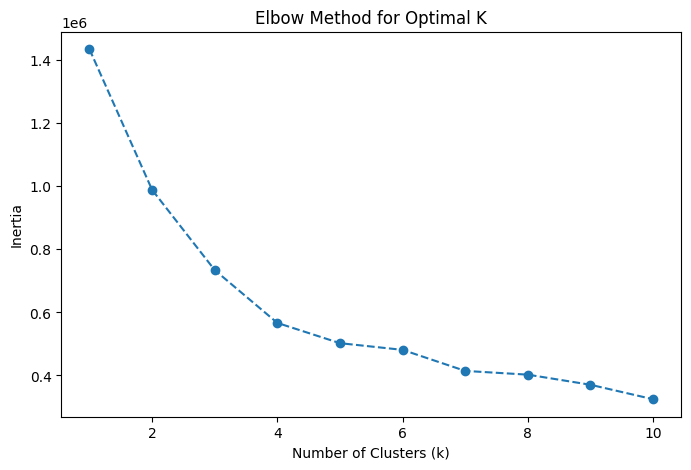

In [131]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [132]:
# Apply K-Means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(normalized_data)

In [133]:
# Display cluster assignments and cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
df_cleaned[['Global_active_power', 'Global_reactive_power', 'Voltage',
      'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Cluster']].head(), cluster_centers


(         Global_active_power  Global_reactive_power  Voltage  \
 1030580                1.502                  0.074   240.17   
 1815                   0.374                  0.264   245.50   
 1295977                0.620                  0.300   239.85   
 206669                 0.280                  0.200   235.72   
 1048893                1.372                  0.054   243.95   
 
          Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
 1030580               6.4             0.0             0.0            18.0   
 1815                  1.8             0.0             2.0             0.0   
 1295977               3.0             0.0             1.0             1.0   
 206669                1.4             0.0             0.0             0.0   
 1048893               5.6             0.0             0.0            18.0   
 
          Cluster  
 1030580        0  
 1815           1  
 1295977        1  
 206669         1  
 1048893        0  ,
 array([[1.837018

In [134]:
# Reduce the dimensions of the normalized data for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)

In [135]:
# Add the reduced dimensions to the dataset for plotting
df_cleaned['PCA1'] = reduced_data[:, 0]
df_cleaned['PCA2'] = reduced_data[:, 1]

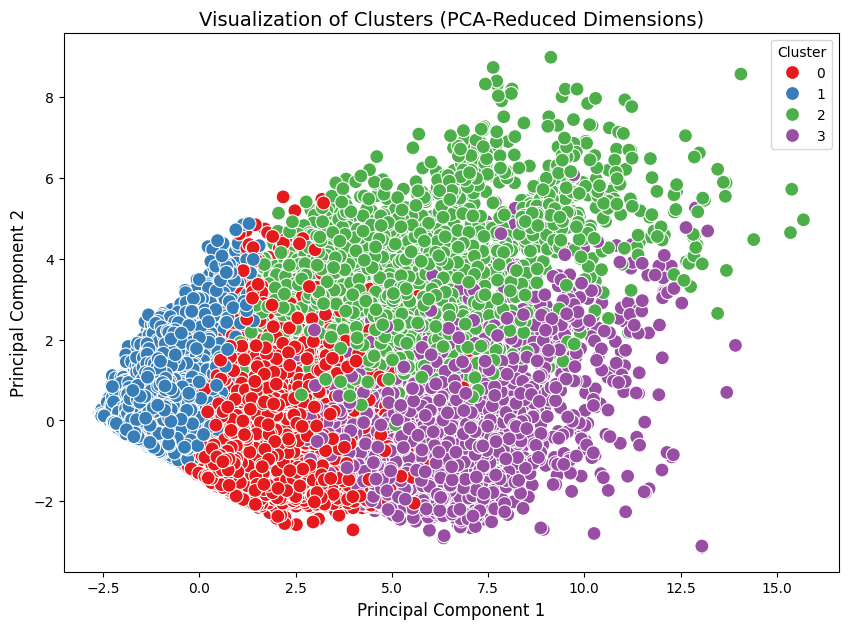

In [136]:
# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_cleaned, palette='Set1', s=100)
plt.title('Visualization of Clusters (PCA-Reduced Dimensions)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()

In [137]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(normalized_data, df_cleaned['Cluster'])

# Calculate Davies-Bouldin Index
dbi_score = davies_bouldin_score(normalized_data, df_cleaned['Cluster'])

silhouette_avg, dbi_score


(0.43870889049632733, 0.8653348591596424)

In [138]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(reduced_data, df_cleaned['Cluster'])

# Calculate Davies-Bouldin Index
dbi_score = davies_bouldin_score(reduced_data, df_cleaned['Cluster'])

silhouette_avg, dbi_score


(0.5440707051340689, 0.937248156993425)

K means mini batch


In [141]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [142]:
# Define MiniBatch KMeans with the number of clusters (k)
mini_kmeans = MiniBatchKMeans(n_clusters=4, random_state=42, batch_size=100)
df_cleaned_MB['MiniBatch_Cluster'] = mini_kmeans.fit_predict(normalized_data)


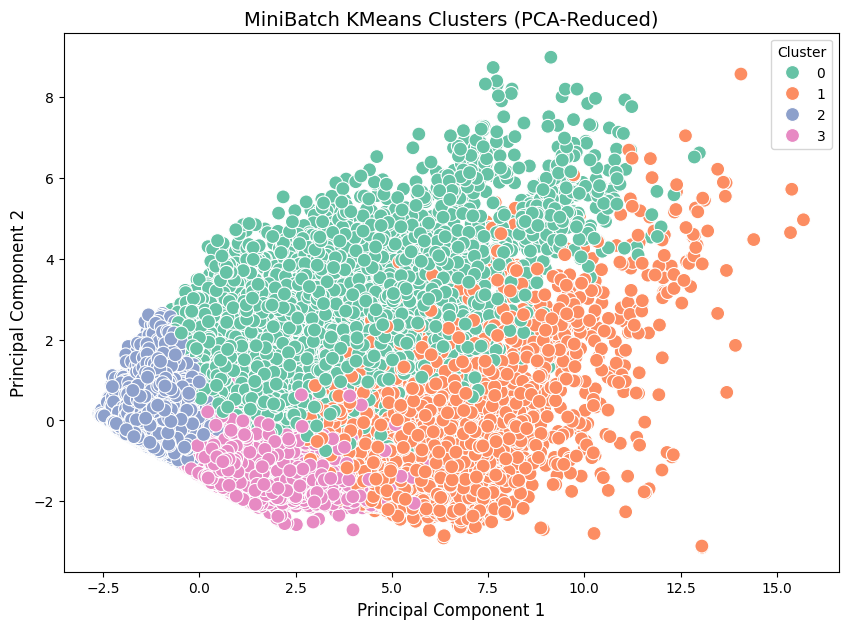

In [143]:
# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)

# Add PCA components and cluster labels to the dataframe
df_cleaned_MB['PCA1'] = reduced_data[:, 0]
df_cleaned_MB['PCA2'] = reduced_data[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='MiniBatch_Cluster', data=df_cleaned_MB, palette='Set2', s=100)
plt.title('MiniBatch KMeans Clusters (PCA-Reduced)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()


In [144]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(normalized_data, df_cleaned_MB['MiniBatch_Cluster'])
print(f'Silhouette Score: {silhouette_avg:.4f}')

# Calculate Davies-Bouldin Index
dbi_score = davies_bouldin_score(normalized_data, df_cleaned_MB['MiniBatch_Cluster'])
print(f'Davies-Bouldin Index: {dbi_score:.4f}')


Silhouette Score: 0.4158
Davies-Bouldin Index: 1.3772


GMM

In [176]:
# Define Gaussian Mixture Model with number of clusters (k)
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(normalized_data)

# Add cluster labels to the dataset
df_cleaned_GM['GMM_Cluster'] = gmm_labels


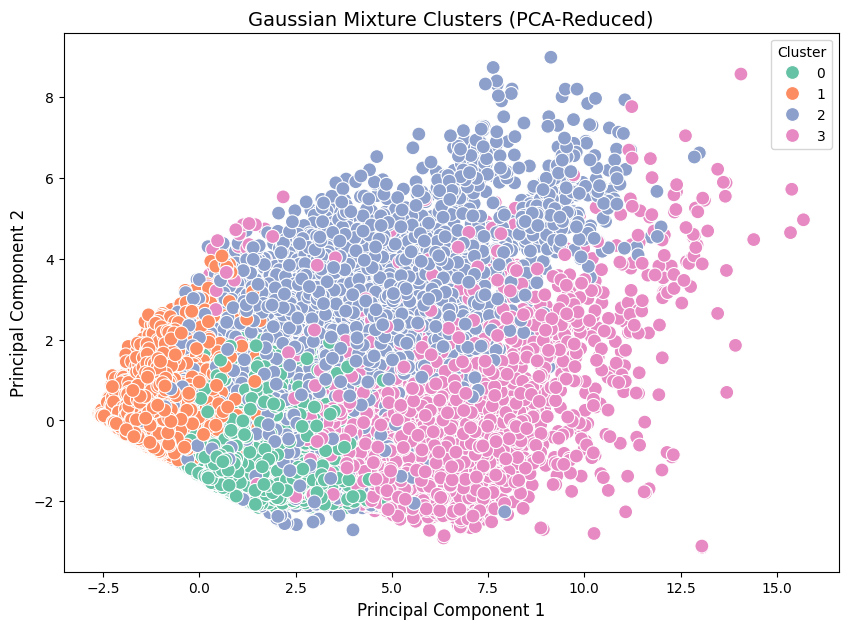

In [177]:
# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)

# Add PCA components to the dataframe
df_cleaned_GM['PCA1'] = reduced_data[:, 0]
df_cleaned_GM['PCA2'] = reduced_data[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='GMM_Cluster', data=df_cleaned_GM, palette='Set2', s=100)
plt.title('Gaussian Mixture Clusters (PCA-Reduced)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()


In [173]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(normalized_data, df_cleaned_GM['GMM_Cluster'])
print(f'Silhouette Score: {silhouette_avg:.4f}')

# Calculate Davies-Bouldin Index
dbi_score = davies_bouldin_score(normalized_data, df_cleaned_GM['GMM_Cluster'])
print(f'Davies-Bouldin Index: {dbi_score:.4f}')


Silhouette Score: 0.3739
Davies-Bouldin Index: 1.6699
